In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
%matplotlib inline
from IPython.core.pylabtools import figsize


In [11]:
N = 100
p = pm.Uniform("freq_cheating", 0, 1)
true_answers = pm.Bernoulli("truths", p, size=N)
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)
second_coin_flips=pm.Bernoulli("second_flips", 0.5, size=N)

In [12]:
@pm.deterministic
def observed_proportion(t_a=true_answers, fc=first_coin_flips, sc=second_coin_flips):
    observed = fc*t_a + (1-fc)*sc
    return observed.sum() / float(N)

In [13]:
X = 35
observations = pm.Binomial("obs", N, observed_proportion, observed=True, value=X)

In [15]:
model= pm.Model([p, true_answers, first_coin_flips, second_coin_flips, observed_proportion, observations])

In [16]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 8.5 sec

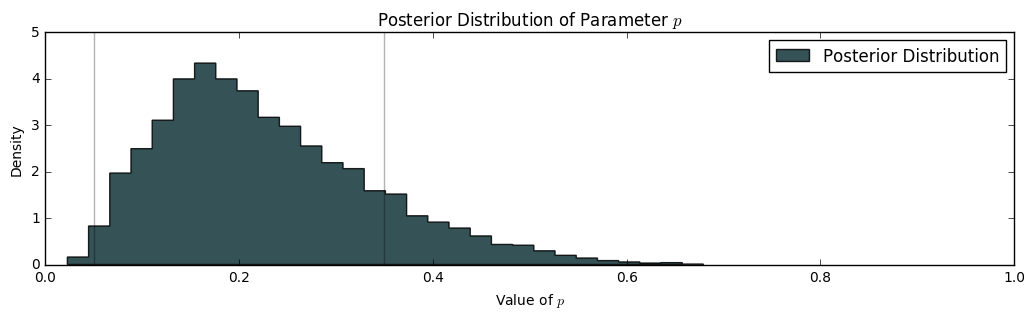

In [20]:
figsize(12.5, 3)
p_trace = mcmc.trace("freq_cheating")[:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, color="#12343A", label="Posterior Distribution")
plt.vlines([.05, .35], [0,0],[5,5], alpha=0.3)
plt.xlim(0, 1)
plt.xlabel("Value of $p$")
plt.ylabel("Density")
plt.title("Posterior Distribution of Parameter $p$")
plt.legend()